# SWMT regions PanAntarctic

In [1]:
import intake
import glob
from pathlib import Path
import cartopy.crs as ccrs
import cf_xarray as cfxr
import cmocean as cm
import dask.distributed
import gsw
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import pdb
import os
import pathlib
import shutil

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/33867/status,
Dashboard: /proxy/33867/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37635,Workers: 0
Dashboard: /proxy/33867/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:39053,Total threads: 1
Dashboard: /proxy/43209/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:41319,


## Importing the saved files

In [29]:
# Open data
save_dir = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/'
save_dir_005 = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/'

Adelie_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_Adelie_pan01.nc').to_array().squeeze()
Adelie_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_Adelie_pan01.nc').to_array().squeeze()
Adelie_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_Adelie_pan005.nc').to_array().squeeze()
Adelie_005_M_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_M_Adelie_pan005.nc').to_array().squeeze()

Ross_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_Ross_pan01.nc').to_array().squeeze()
Ross_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_Ross_pan01.nc').to_array().squeeze()
Ross_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_Ross_pan005.nc').to_array().squeeze()
Ross_005_M_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_M_Ross_pan005.nc').to_array().squeeze()

Am_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_Am_pan01.nc').to_array().squeeze()
Am_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_Am_pan01.nc').to_array().squeeze()
Am_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_Am_pan005.nc').to_array().squeeze()
Am_005_M_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_M_Am_pan005.nc').to_array().squeeze()

Be_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_Be_pan01.nc').to_array().squeeze()
Be_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_Be_pan01.nc').to_array().squeeze()
Be_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_Be_pan005.nc').to_array().squeeze()
Be_005_M_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_M_Be_pan005.nc').to_array().squeeze()

Weddell_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_Weddell_pan01.nc').to_array().squeeze()
Weddell_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_Weddell_pan01.nc').to_array().squeeze()
Weddell_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_Weddell_pan005.nc').to_array().squeeze()
Weddell_005_M_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_M_Weddell_pan005.nc').to_array().squeeze()

Prydz_01_C_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_C_Prydz_pan01.nc').to_array().squeeze()
Prydz_01_M_map = xr.open_dataset(save_dir + 'swmt_shelf_sum_ave_M_Prydz_pan01.nc').to_array().squeeze()
Prydz_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_Prydz_pan005.nc').to_array().squeeze()
Prydz_005_M_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_M_Prydz_pan005.nc').to_array().squeeze()

In [30]:
# Calculate anomalies
Adelie_01 = Adelie_01_M_map - Adelie_01_C_map
Adelie_005 = Adelie_005_M_map - Adelie_005_C_map

Ross_01 = Ross_01_M_map - Ross_01_C_map
Ross_005 = Ross_005_M_map - Ross_005_C_map

Am_01 = Am_01_M_map - Am_01_C_map
Am_005 = Am_005_M_map - Am_005_C_map

Be_01 = Be_01_M_map - Be_01_C_map
Be_005 = Be_005_M_map - Be_005_C_map

Weddell_01 = Weddell_01_M_map - Weddell_01_C_map
Weddell_005 = Weddell_005_M_map - Weddell_005_C_map

Prydz_01 = Prydz_01_M_map - Prydz_01_C_map
Prydz_005 = Prydz_005_M_map - Prydz_005_C_map

In [170]:
# This is whole shelf average
pan01_25 = 27.89
pan01_75 = 27.73 

# Thresholds from pan01 regional data
Ad_25 = 27.71
Ad_75 = 27.67

Ro_25 = 28.03
Ro_75 = 27.87

Am_25 = 27.55
Am_75 = 27.44

Be_25 = 27.53 
Be_75 = 27.33

We_25 = 27.85
We_75 = 27.79

Pr_25 = 27.75
Pr_75 = 27.71

In [171]:
# 25th percentile for each region
p25_list = [Ad_25, Ro_25, Am_25, Be_25, We_25, Pr_25]

# 75th percentile for each region
p75_list = [Ad_75, Ro_75, Am_75, Be_75, We_75, Pr_75]

### Pan01

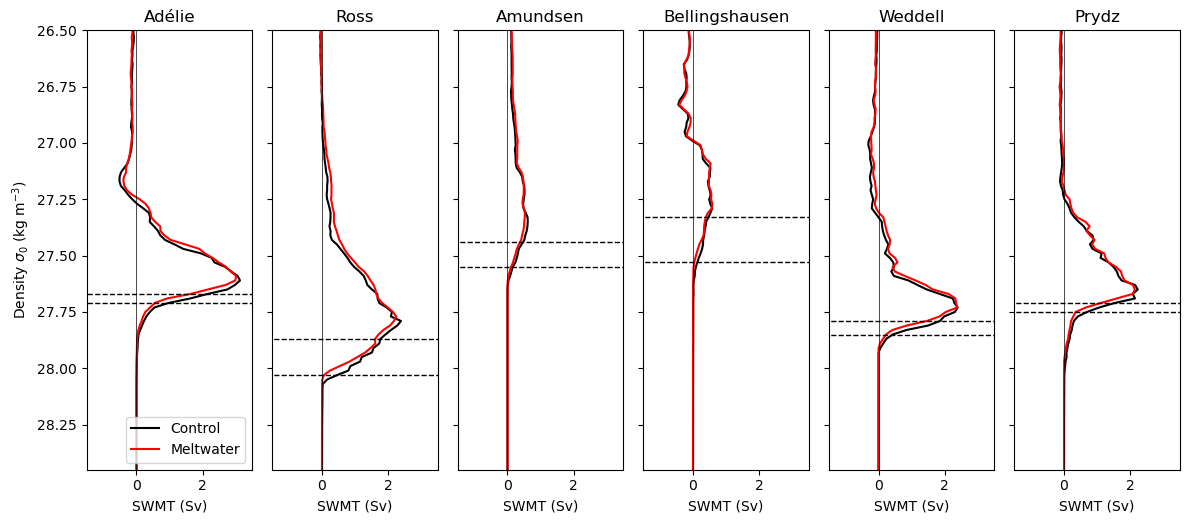

In [179]:
import matplotlib.pyplot as plt

# Example: put your six datasets in lists so you can loop through them
controls = [Adelie_01_C_map, Ross_01_C_map, Am_01_C_map,
            Be_01_C_map, Weddell_01_C_map, Prydz_01_C_map]
melts = [Adelie_01_M_map, Ross_01_M_map, Am_01_M_map,
         Be_01_M_map, Weddell_01_M_map, Prydz_01_M_map]

titles = ["Adélie", "Ross", "Amundsen", "Bellingshausen", "Weddell", "Prydz"]

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(6*2, 5.33), sharey=True)

for i, (ax, C, M, title) in enumerate(zip(axes, controls, melts, titles)):
    ax.plot(C, C['isopycnal_bins'], color='k', label='Control')
    ax.plot(M, M['isopycnal_bins'], color='r', label='Meltwater')
    ax.plot([0, 0], [26.5, 28.48], 'k', linewidth=0.5)
    
    # use the 25th and 75th percentile for this subplot
    ax.plot([-5, 15], [p25_list[i], p25_list[i]], 'k--', linewidth=1)
    ax.plot([-5, 15], [p75_list[i], p75_list[i]], 'k--', linewidth=1)
    
    ax.set_ylim((28.45, 26.5))
    ax.set_xlim((-1.5, 3.5))
    ax.yaxis.set_label_position("left")
    ax.yaxis.tick_left()
    ax.set_title(title)
    ax.set_xlabel('SWMT (Sv)')

axes[0].set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()

#### Finding the 25-75 thresholds

Finding 25-75 thresholds based on pan01 data:  
- Adelie max = 3.12447384 Sv
    - 25%: 0.78111846 Sv at 27.71 
    - 75%: 2.34335538 Sv at 27.67
      
- Ross max = 2.38549124 Sv
    - 25%: 0.59637281 Sv at 28.03  
    - 75%: 1.78911843 Sv at 27.87  
      
- Amundsen max = 0.61088621 Sv
    - 25%: 0.1527215525 Sv at 27.55
    - 75%: 0.4581646575 Sv at 27.44  
      
- Bellingshausen max = 0.5790174 Sv
    - 25%: 0.14475435 Sv at 27.53  
    - 75%: 0.43426305 Sv at 27.33   
      
- Weddell max = 2.3894134 Sv
    - 25%: 0.59735335 Sv at 27.85
    - 75%: 1.79206005 Sv at 27.79
      
- Prydz max = 2.22335202 Sv
    - 25%: 0.555838005 Sv at 27.75
    - 75%: 1.667514015 Sv at 27.

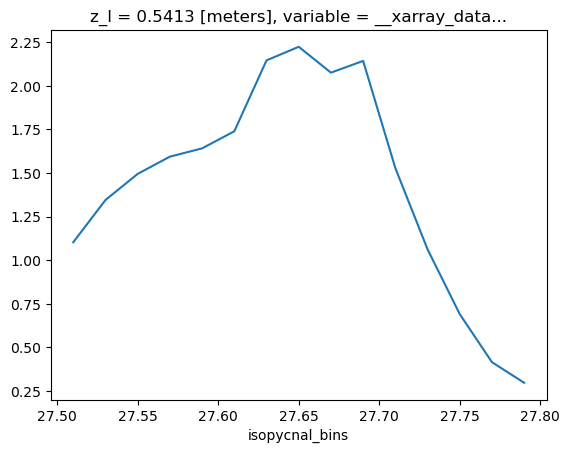

In [150]:
# Finding maximum
Prydz_01_C_map.sel(isopycnal_bins=slice(27.5,27.8)).plot() # Pick slice based on plot, test for max value

In [168]:
max_value = 27.71
Prydz_01_C_map.sel(isopycnal_bins=str(max_value),method='nearest').load()

<xarray.DataArray ()> Size: 8B
array(1.52767978)
Coordinates:
    isopycnal_bins  float64 8B 27.71
    z_l             float64 8B 0.5413
    variable        <U29 116B '__xarray_dataarray_variable__'

### Pan005 

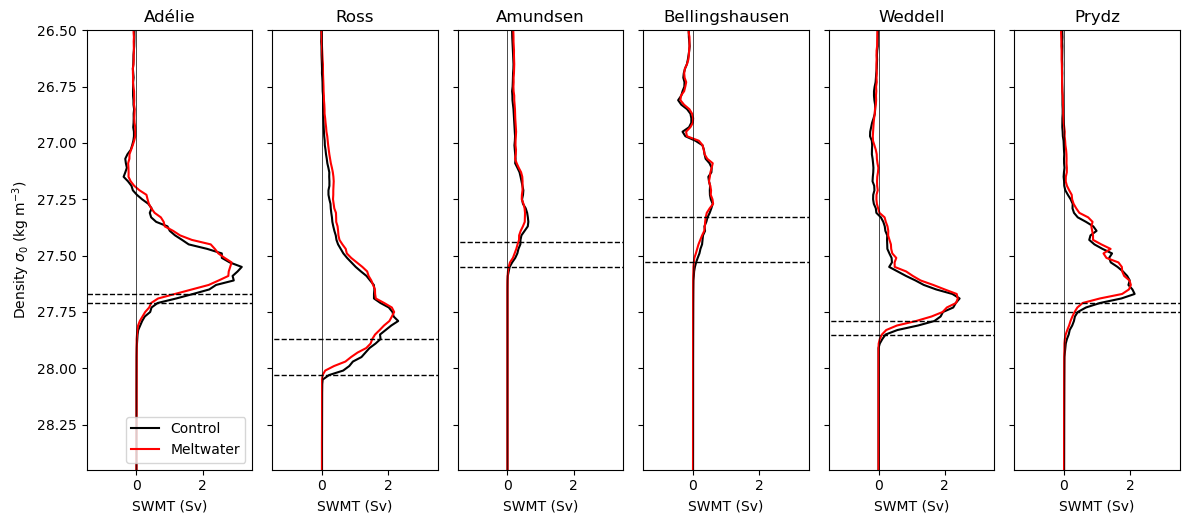

In [180]:
import matplotlib.pyplot as plt

# Example: put your six datasets in lists so you can loop through them
controls = [Adelie_005_C_map, Ross_005_C_map, Am_005_C_map,
            Be_005_C_map, Weddell_005_C_map, Prydz_005_C_map]
melts = [Adelie_005_M_map, Ross_005_M_map, Am_005_M_map,
         Be_005_M_map, Weddell_005_M_map, Prydz_005_M_map]

titles = ["Adélie", "Ross", "Amundsen", "Bellingshausen", "Weddell", "Prydz"]

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(6*2, 5.33), sharey=True)

for i, (ax, C, M, title) in enumerate(zip(axes, controls, melts, titles)):
    ax.plot(C, C['isopycnal_bins'], color='k', label='Control')
    ax.plot(M, M['isopycnal_bins'], color='r', label='Meltwater')
    ax.plot([0, 0], [26.5, 28.48], 'k', linewidth=0.5)
    
    # use the 25th and 75th percentile for this subplot
    ax.plot([-5, 15], [p25_list[i], p25_list[i]], 'k--', linewidth=1)
    ax.plot([-5, 15], [p75_list[i], p75_list[i]], 'k--', linewidth=1)
    
    ax.set_ylim((28.45, 26.5))
    ax.set_xlim((-1.5, 3.5))
    ax.yaxis.set_label_position("left")
    ax.yaxis.tick_left()
    ax.set_title(title)
    ax.set_xlabel('SWMT (Sv)')

axes[0].set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()

Should update above with pan005 25-75% threshold lines

### Anomalies

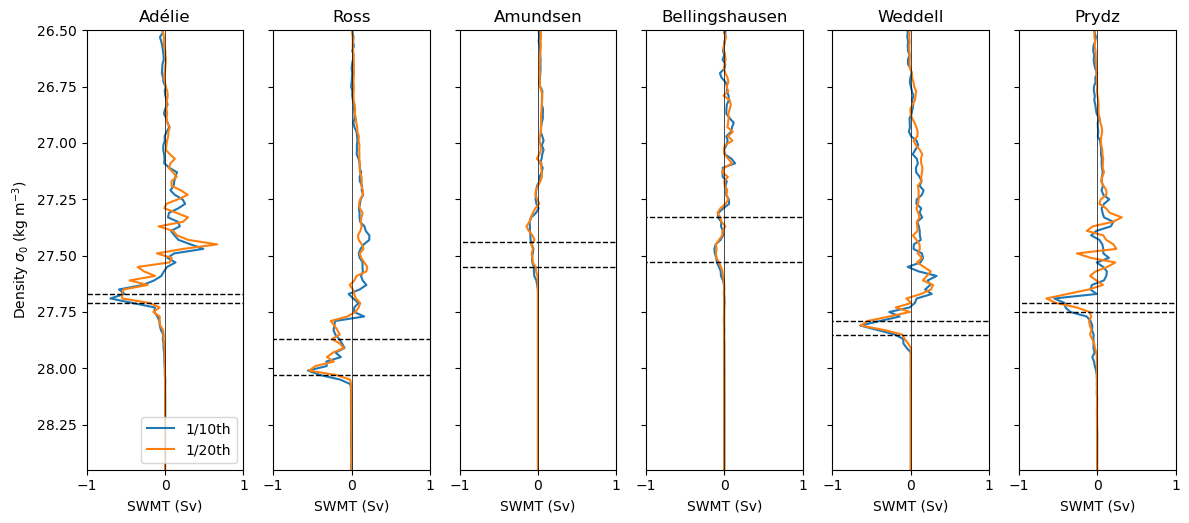

In [186]:
import matplotlib.pyplot as plt

# Example: put your six datasets in lists so you can loop through them
pan01 = [Adelie_01, Ross_01, Am_01,
            Be_01, Weddell_01, Prydz_01]
pan005 = [Adelie_005, Ross_005, Am_005,
         Be_005, Weddell_005, Prydz_005]

titles = ["Adélie", "Ross", "Amundsen", "Bellingshausen", "Weddell", "Prydz"]

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(6*2, 5.33), sharey=True)

for i, (ax, C, M, title) in enumerate(zip(axes, pan01, pan005, titles)):
    ax.plot(C, C['isopycnal_bins'], label='1/10th')
    ax.plot(M, M['isopycnal_bins'], label='1/20th')
    ax.plot([0, 0], [26.5, 28.48], 'k', linewidth=0.5)
    
    # use the 25th and 75th percentile for this subplot
    ax.plot([-5, 15], [p25_list[i], p25_list[i]], 'k--', linewidth=1)
    ax.plot([-5, 15], [p75_list[i], p75_list[i]], 'k--', linewidth=1)
    
    ax.set_ylim((28.45, 26.5))
    ax.set_xlim((-1, 1))
    ax.yaxis.set_label_position("left")
    ax.yaxis.tick_left()
    ax.set_title(title)
    ax.set_xlabel('SWMT (Sv)')

axes[0].set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Time series

In [228]:
# Open data
save_dir = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/'
save_dir_005 = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/'

Adelie_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_Adelie_pan01.nc').to_array().squeeze()
Adelie_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_Adelie_pan01.nc').to_array().squeeze()
Adelie_005_C = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_C_Adelie_pan005.nc').to_array().squeeze()
Adelie_005_M = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_M_Adelie_pan005.nc').to_array().squeeze()

Ross_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_Ross_pan01.nc').to_array().squeeze()
Ross_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_Ross_pan01.nc').to_array().squeeze()
Ross_005_C = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_C_Ross_pan005.nc').to_array().squeeze()
Ross_005_M = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_M_Ross_pan005.nc').to_array().squeeze()

Amundsen_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_Am_pan01.nc').to_array().squeeze()
Amundsen_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_Am_pan01.nc').to_array().squeeze()
Amundsen_005_C = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_C_Am_pan005.nc').to_array().squeeze()
Amundsen_005_M = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_M_Am_pan005.nc').to_array().squeeze()

Bellingshausen_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_Be_pan01.nc').to_array().squeeze()
Bellingshausen_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_Be_pan01.nc').to_array().squeeze()
Bellingshausen_005_C = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_C_Be_pan005.nc').to_array().squeeze()
Bellingshausen_005_M = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_M_Be_pan005.nc').to_array().squeeze()

Weddell_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_Weddell_pan01.nc').to_array().squeeze()
Weddell_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_Weddell_pan01.nc').to_array().squeeze()
Weddell_005_C = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_C_Weddell_pan005.nc').to_array().squeeze()
Weddell_005_M = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_M_Weddell_pan005.nc').to_array().squeeze()

Prydz_01_C = xr.open_dataset(save_dir + 'swmt_shelf_sum_C_Prydz_pan01.nc').to_array().squeeze()
Prydz_01_M = xr.open_dataset(save_dir + 'swmt_shelf_sum_M_Prydz_pan01.nc').to_array().squeeze()
Prydz_005_C = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_C_Prydz_pan005.nc').to_array().squeeze()
Prydz_005_M = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_M_Prydz_pan005.nc').to_array().squeeze()

In [229]:
regions = {
    'Adelie': {'25': Ad_25, '75': Ad_75},
    'Ross': {'25': Ro_25, '75': Ro_75},
    'Amundsen': {'25': Am_25, '75': Am_75},
    'Bellingshausen': {'25': Be_25, '75': Be_75},
    'Weddell': {'25': We_25, '75': We_75},
    'Prydz': {'25': Pr_25, '75': Pr_75}
}

resolutions = ['01', '005']

# store results and differences in a dictionary
swmt_time = {}
swmt_diff = {}  # M - C differences

for region_name, bounds in regions.items():
    swmt_time[region_name] = {}
    swmt_diff[region_name] = {}
    for res in resolutions:
        # fetch the datasets
        ds_C = globals()[f"{region_name}_{res}_C"]
        ds_M = globals()[f"{region_name}_{res}_M"]
        
        # compute mean over isopycnal_bins
        ds_C_time = ds_C.sel(isopycnal_bins=slice(bounds['75'], bounds['25'])).mean('isopycnal_bins').compute()
        ds_M_time = ds_M.sel(isopycnal_bins=slice(bounds['75'], bounds['25'])).mean('isopycnal_bins').compute()
        
        # store in dictionary
        swmt_time[region_name][res] = {'C': ds_C_time, 'M': ds_M_time}
        
        # compute difference M - C
        swmt_diff[region_name][res] = ds_M_time - ds_C_time

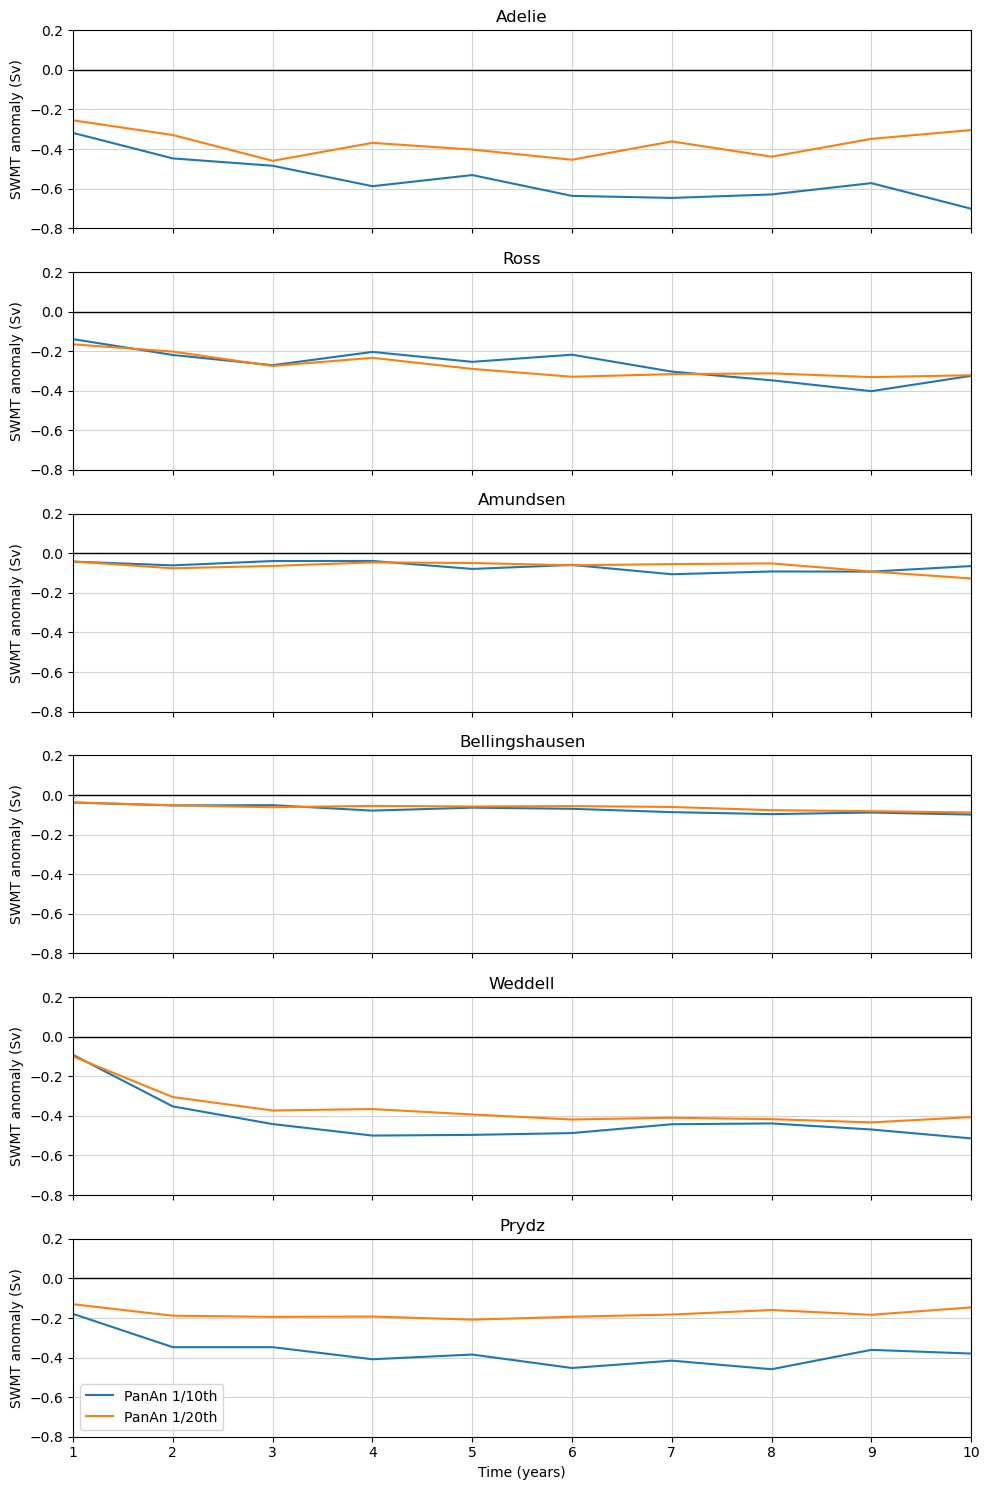

In [230]:
regions_order = ['Adelie', 'Ross', 'Amundsen', 'Bellingshausen', 'Weddell', 'Prydz']

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 15), sharey=True, sharex=True)
axes = axes.flatten()  # flatten to 1D array for easy looping

for i, (ax, region) in enumerate(zip(axes, regions_order)):
    for res, label in zip(['01', '005'], ['PanAn 1/10th', 'PanAn 1/20th']):
        data = swmt_diff[region][res]
        
        # Shift time by +1 to go from 1–10
        shifted_time = data['time'].values + 1
        data_shifted = xr.DataArray(data.values, coords=[shifted_time], dims=['time'])
        
        # Disable automatic legend and xlabel
        data_shifted.plot(ax=ax, label=label, add_legend=False)

    # Add horizontal black line at y=0
    ax.axhline(0, color='k', linewidth=1)
    
    ax.set_xlim(1, 10)
    ax.set_ylim(-0.8, 0.2)
    ax.set_ylabel("SWMT anomaly (Sv)")
    ax.set_title(region)
    ax.grid(True, color='lightgrey')
    
    # Only bottom subplot gets xlabel and legend
    if i == len(axes) - 1:
        ax.set_xlabel('Time (years)')
        ax.legend()
    else:
        ax.set_xlabel('')

plt.tight_layout()
plt.show()
